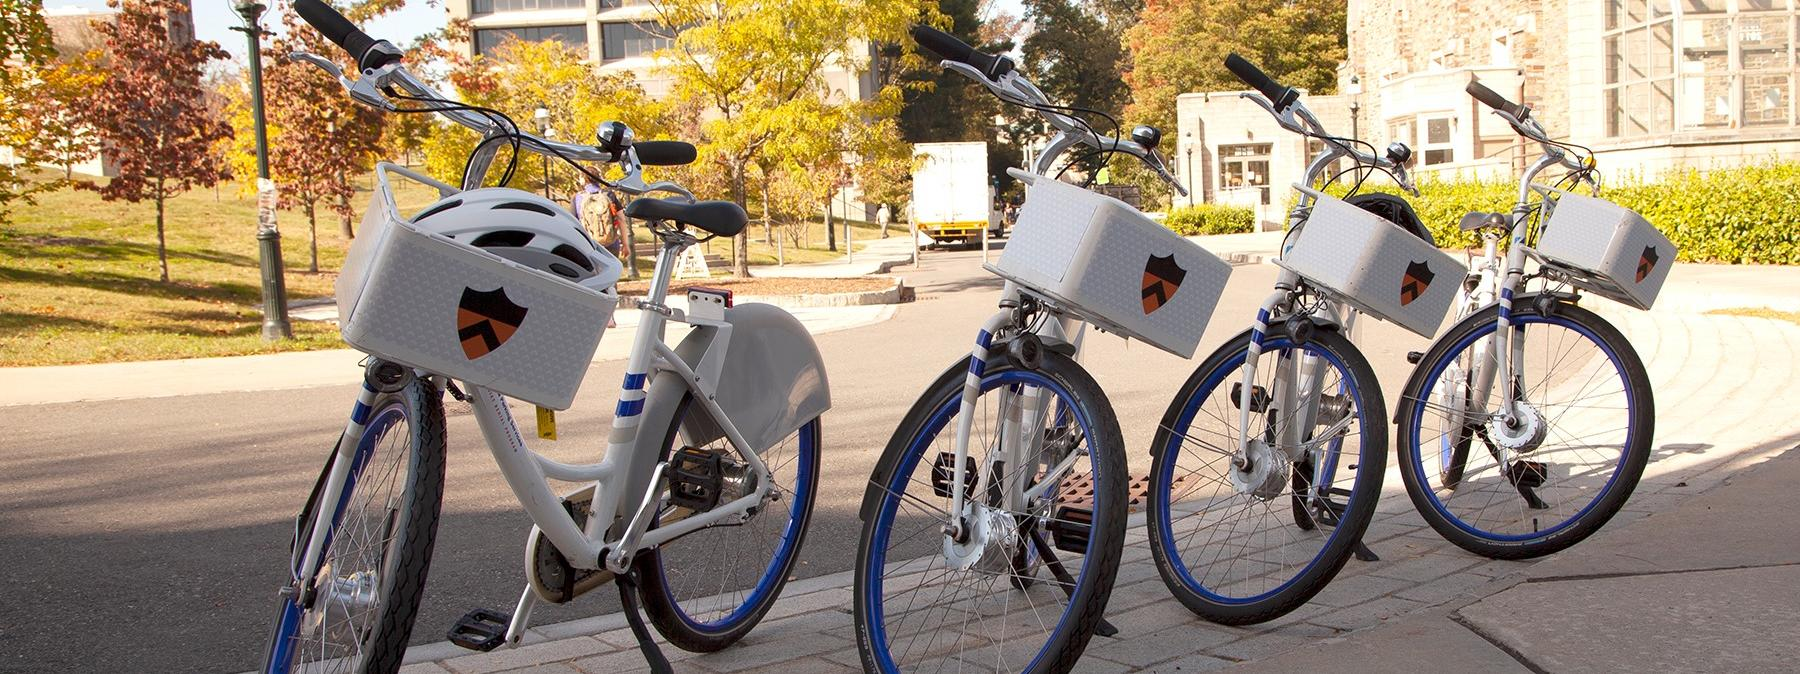

# Problem Statement
This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same. 

 

## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


# Step 1: Reading and understanding data

In [330]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [331]:
#reading data
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', None) 

bike= pd.read_csv(r"C:\Users\Rohit Chaudhary\Desktop\Upgrad notes\Bike sharing assignment LR\day.csv")
bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


## Data dictionary

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [332]:
#sanity check
#cnt should be equal to casul +registeries
(bike.cnt == bike.casual + bike.registered).value_counts()

True    730
dtype: int64

In [333]:
#data information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Step 2: Visulaizing data

In [334]:
#Univariate Analysis
num_cols1=bike.select_dtypes(["float64", 'int64']).columns
num_cols1

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

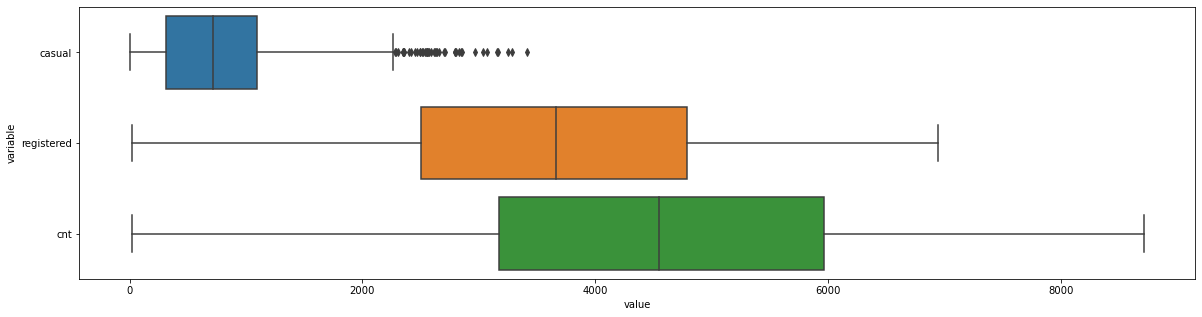

In [335]:
plt.figure(figsize=(20,5))
sns.boxplot(y='variable', x='value', data=pd.melt(bike[[ 'casual',
       'registered', 'cnt']]))
plt.show()

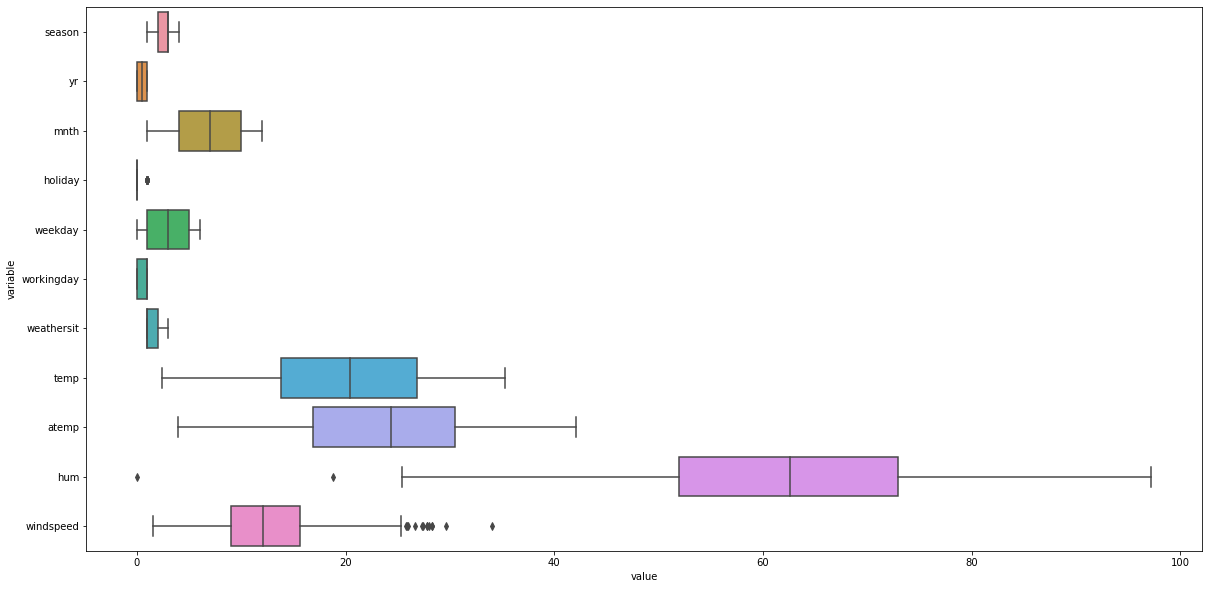

In [336]:
plt.figure(figsize=(20,10))
sns.boxplot(y='variable', x='value', data=pd.melt(bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]))
plt.show()

In [337]:
# treating columns with maximum outliers i.e. hum, windspeed, rest of the data is mostly outliers free.
# casual column is correlated with cnt hence not removing rows for outliers in casual as same is also not considered while formulating model.
# Holidays are very less in a year thus same cannot be considered as outliers
#As data is having only 730 rows therfore not dropping the rows
# Capping and flooring the outliers in above column
upper_bound_hum =bike['hum'].quantile(0.75)+(bike.hum.quantile(0.75) -bike.hum.quantile(0.25))*1.5
upper_bound_windspeed =bike.windspeed.quantile(0.75)+(bike.windspeed.quantile(0.75) -bike.windspeed.quantile(0.25))*1.5
lower_bound_hum =bike['hum'].quantile(0.25)-(bike.hum.quantile(0.75) -bike.hum.quantile(0.25))*1.5
lower_bound_windspeed =bike.windspeed.quantile(0.25)-(bike.windspeed.quantile(0.75) - bike.windspeed.quantile(0.25))*1.5
#capping
bike['hum']= np.where(bike['hum']>upper_bound_hum,upper_bound_hum,bike['hum'])
bike.windspeed= np.where(bike.windspeed>upper_bound_windspeed,upper_bound_windspeed,bike.windspeed)
#flooring
bike['hum']= np.where(bike['hum']<lower_bound_hum,lower_bound_hum,bike['hum'])
bike.windspeed= np.where(bike.windspeed<lower_bound_windspeed,lower_bound_windspeed,bike.windspeed)

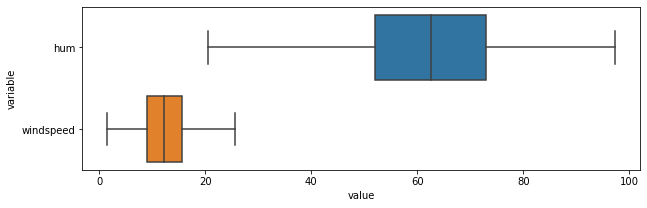

In [338]:
# rechecking outliers
plt.figure(figsize=(10,3))
sns.boxplot(y='variable', x='value', data=pd.melt(bike[['hum', 'windspeed']]))
plt.show()

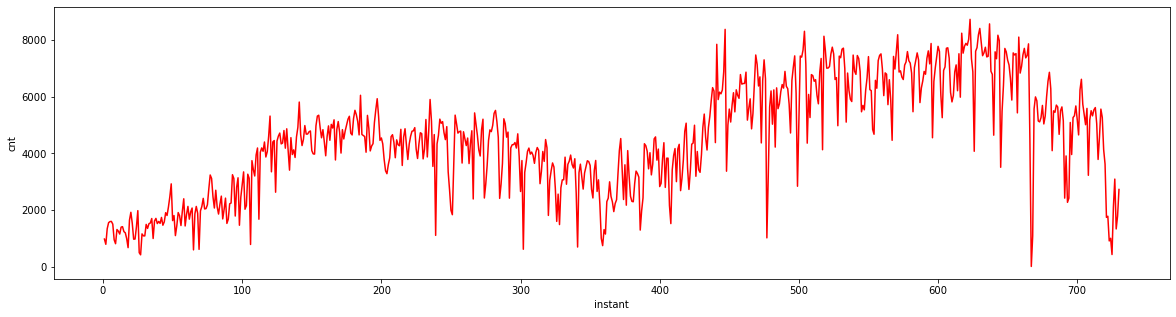

In [339]:
#Distribution of total demand over time
plt.figure(figsize=(20,5))
sns.lineplot(bike['instant'], bike["cnt"], color='red' )
plt.show()

- Also, users using bikes has significantlly decreased after ~660 user count

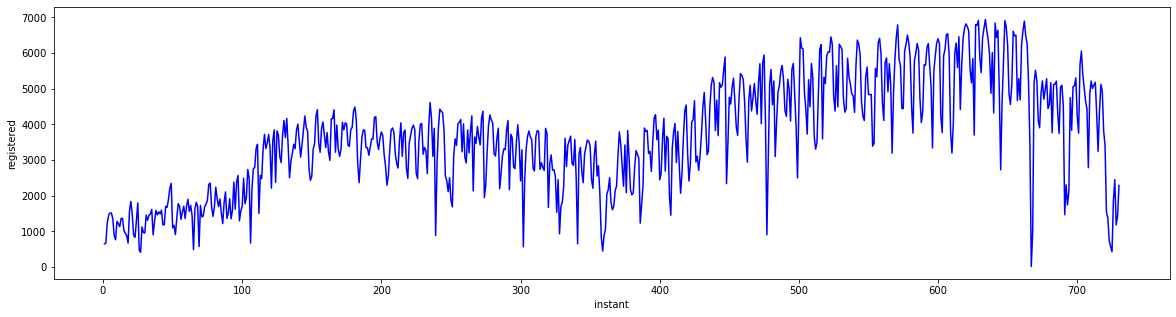

In [340]:
#Distribution of registered user over time
plt.figure(figsize=(20,5))
sns.lineplot(bike['instant'], bike["registered"], color='blue' )
plt.show()

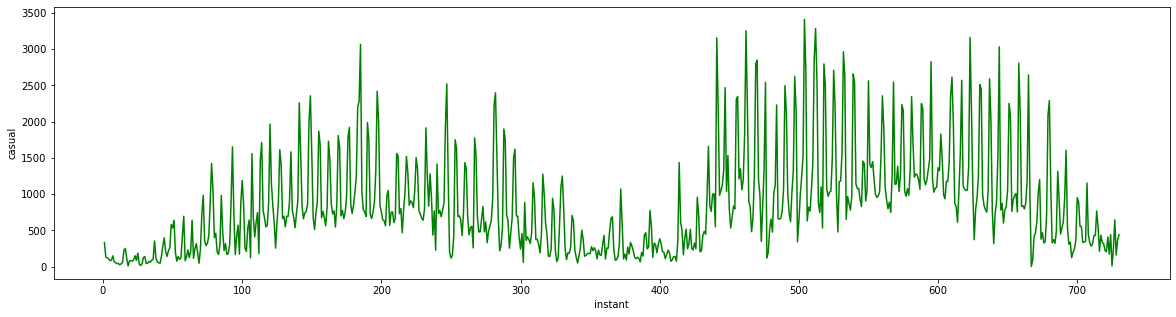

In [341]:
#Distribution of casual users over time
plt.figure(figsize=(20,5 ))
sns.lineplot(bike['instant'], bike["casual"], color='green' )
plt.show()

In [342]:
#% count of regsitered and casual users in data
print (" % of casual users are", (round(bike.casual.sum()/bike.cnt.sum()*100,2)))
print (" % of registered users are", (round(bike.registered.sum()/bike.cnt.sum()*100,2)))

 % of casual users are 18.84
 % of registered users are 81.16


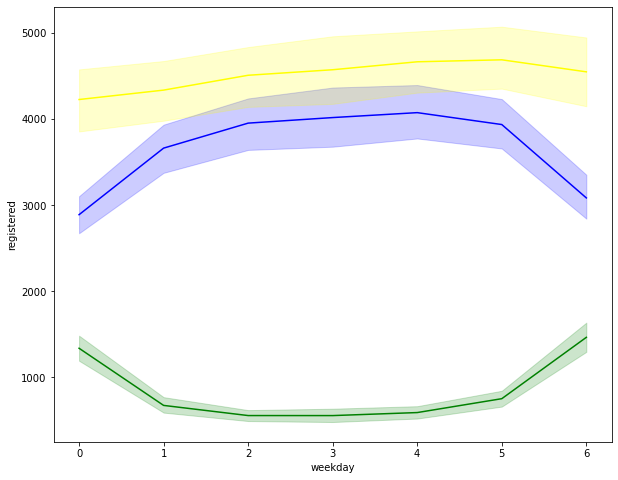

In [343]:
#Distribution of total,registered & casual users with weekday
plt.figure(figsize=(10,8))
sns.lineplot(bike['weekday'], bike["registered"], color='blue' )
sns.lineplot(bike['weekday'], bike["casual"], color='green' )
sns.lineplot(bike['weekday'], bike["cnt"], color='yellow' )
plt.show()

- Registered users like to register bike on weekdays leading to high demand on weekdays whereas casual users have high count on weekdays

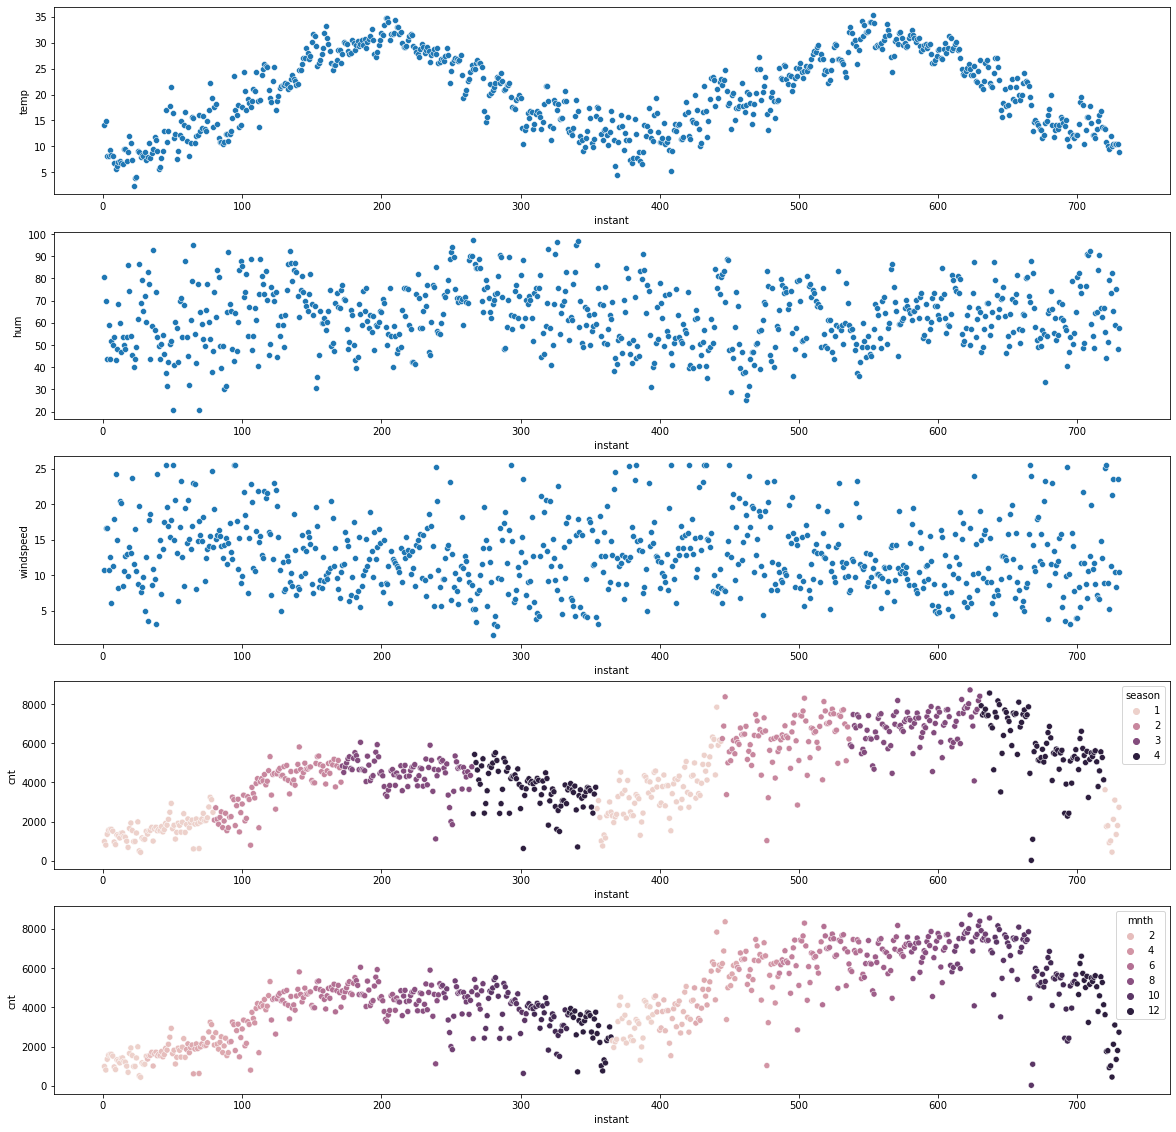

In [344]:
# varaition of count  w.r.t to month and season
plt.subplots(figsize=(20,20))
plt.subplot(5, 1,1)
sns.scatterplot(bike['instant'], bike["temp"])
plt.subplot(5, 1,2)
sns.scatterplot(bike['instant'], bike["hum"])
plt.subplot(5, 1,3)
sns.scatterplot(bike['instant'], bike["windspeed"])
plt.subplot(5, 1,4)
sns.scatterplot(bike['instant'], bike["cnt"], color='red',hue=bike["season"])
plt.subplot(5, 1,5)
sns.scatterplot(bike['instant'], bike["cnt"], color='blue',hue=bike["mnth"])

plt.show()

season (1:spring, 2:summer, 3:fall, 4:winter)

month(1: Jan ......12: December)

- As seen in plot above, there is a trend max users are in fall and summer season(Aug-Sept Month max) and user count falls in spring  and winter season (December- Jan month min)

In [345]:
# Mean temperture in various seasons 
# season (1:spring, 2:summer, 3:fall, 4:winter)
bike.groupby(by="season")["temp"].mean()

season
1    12.197035
2    22.320611
3    28.958682
4    17.339148
Name: temp, dtype: float64

In [346]:
# Checking snowfall occurence via season and year
bike.groupby(["yr","season","weathersit"])["weathersit"].count()

yr  season  weathersit
0   1       1             56
            2             32
            3              2
    2       1             52
            2             38
            3              2
    3       1             66
            2             25
            3              3
    4       1             52
            2             29
            3              8
1   1       1             55
            2             33
            3              2
    2       1             61
            2             30
            3              1
    3       1             70
            2             23
            3              1
    4       1             51
            2             36
            3              2
Name: weathersit, dtype: int64

    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    season (1:spring, 2:summer, 3:fall, 4:winter)

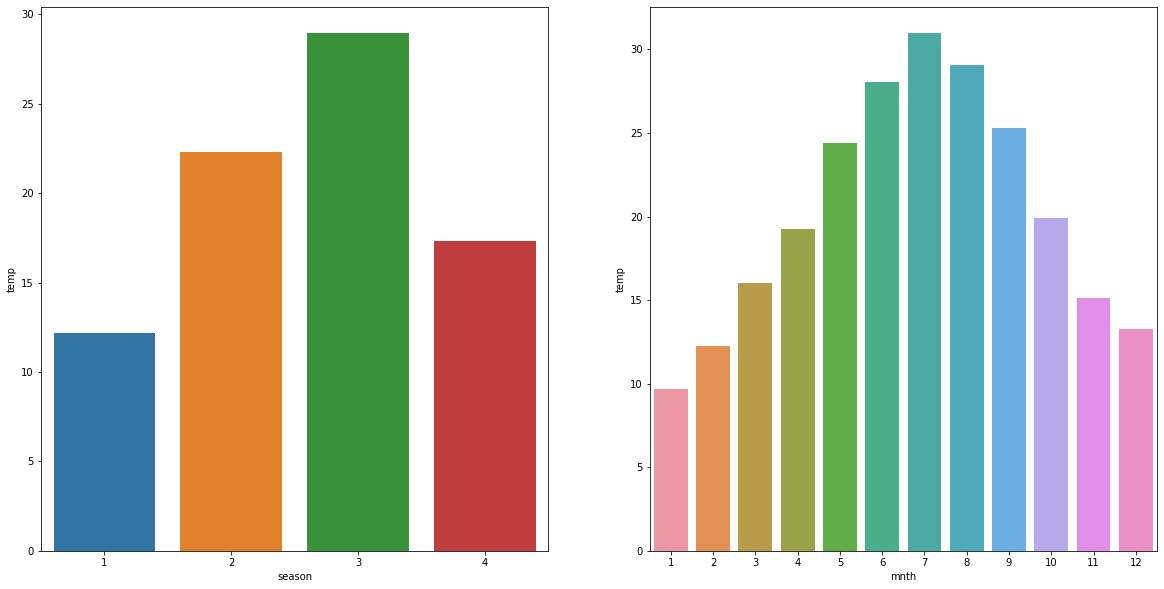

In [347]:
#Let us check varaition of temperature with month and season
plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(bike['season'], bike["temp"], ci=None)
plt.subplot(1,2,2)
sns.barplot(bike['mnth'], bike["temp"],  ci=None)
plt.show()

season (1:spring, 2:summer, 3:fall, 4:winter)

month(1: Jan ......12: December)

In [348]:
import plotly

In [349]:
# Checking variation of temperature with dates through interactive plot
import plotly.express as px
fig = px.line(bike, x="dteday", y="temp")
fig.show()

In [350]:
bike.drop(["instant","dteday"], inplace=True, axis =1)

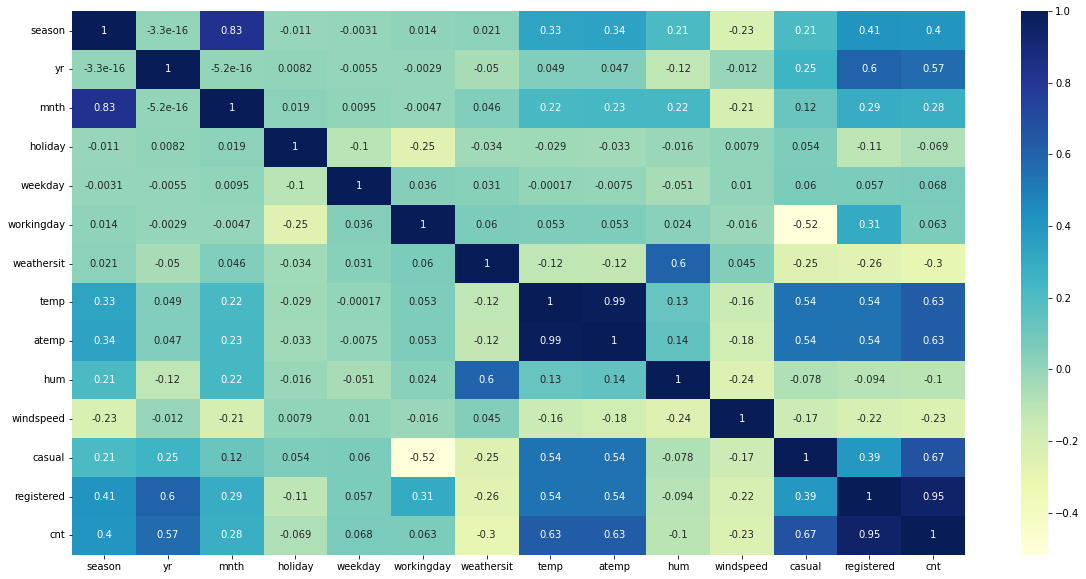

In [351]:
#Corelation
plt.figure(figsize=(20,10))
sns.heatmap(bike.corr(), annot=True, cmap="YlGnBu")
plt.show()

As seen few columns are highly correlated with `cnt` variable

In [352]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [353]:
var1_cols= ['temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered']

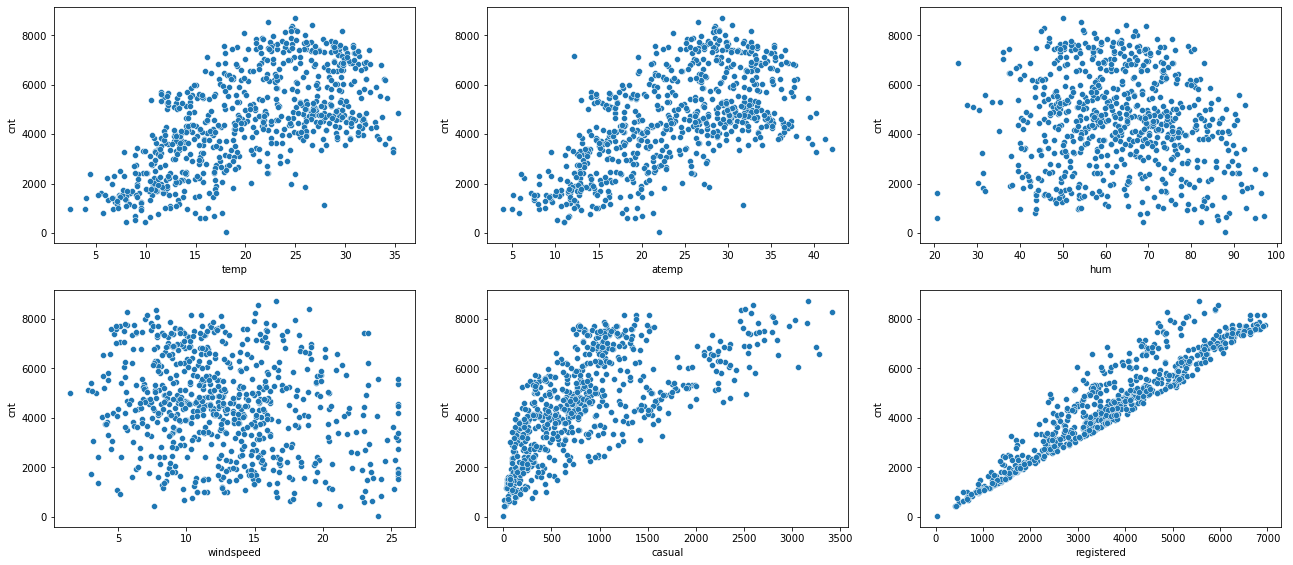

In [354]:
#Distribution of total user with all the numeric columns
plt.subplots(figsize=(22,20))
i=1
for col in var1_cols:
    plt.subplot(int(len(var1_cols)/2)+1,3,i)
    sns.scatterplot(data=bike, x=col, y="cnt")
    i+=1

- Cnt has high corelation with registered & casual.
- Cnt has high corelation with temp, atemp and hum.

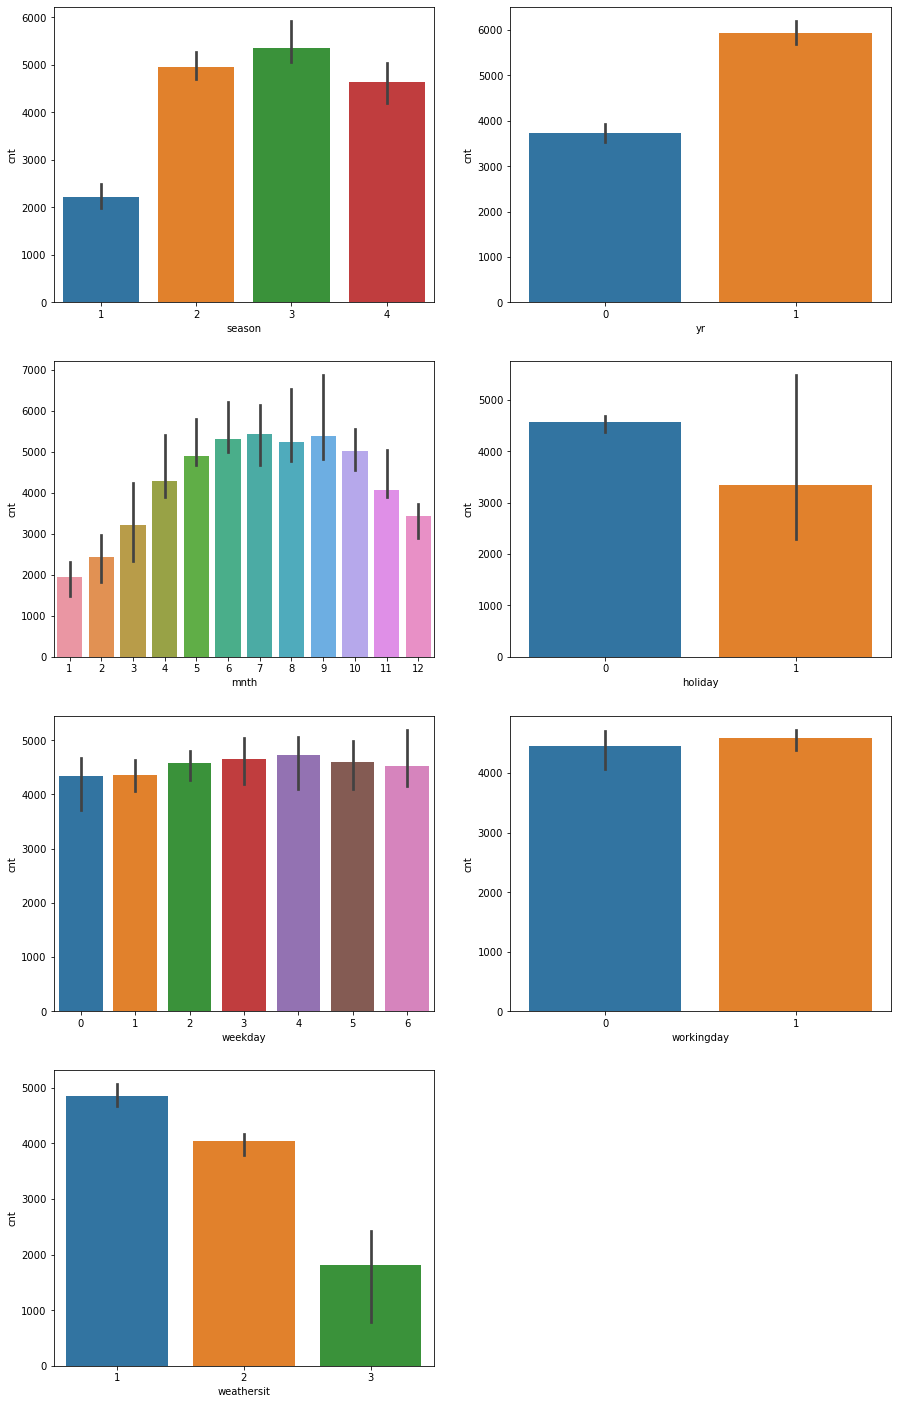

In [355]:
#Distribution of total user with all the categorical columns
var2_cols= ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']

plt.subplots(figsize=(15,25))
i=1
for col in var2_cols:
    plt.subplot(int(len(var2_cols)/2)+1,2,i)
    sns.barplot(data=bike, x=col, y="cnt", estimator=np.median)
    i+=1

- season (1:spring, 2:summer, 3:fall, 4:winter)
- yr (0: 2018, 1: 2019)
- month(1: Jan ......12: December)
- holiday(0: No holiday, 1: Holiday )
- weekday(0-Sunday,1-Monday ...6- Saturday)
- Workingday(0: Weekend, 1: Workingday )
- Weathersit
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

### Observations:
- As expected on light rainy, light snowy days cnt is less compared to clear weather 
- Median Demand of bikes on working day is slightly higher than weekend.
- On holidays there are relatively less users, however it is not consistent, indicating presence of outliers.
- There are more users in the mid year compare to starting and ending of year probabily due to winters.

 Above obervation are as per visualization, however we will analyze it through modeling.

# Step 3: Data preperation

In [356]:
#Identifying categorical variables

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

`Season`, `weathersit` are actually categorical variables for which dummy variables are required
As season and weathersit variables are having 4 values, therfore they shall require 3 dummy varaibles. mnth can also be considered as categorical varaible, however since there are other variables like season, weather, hence not creating 11 dummy variables for mnth column. Also weekday is also not converted to categorical variable as same is being represented by workingday.

In [357]:
#First of all converting season variable to original categorical variable
def season(i):
    if i ==1:return 'spring'
    elif i ==2:return 'summer'
    elif i ==3:return 'fall'
    elif i== 4: return 'winter'
bike["season"]= bike["season"].apply(season)

In [358]:
#creating dummy variables for season 
season_dummy=pd.get_dummies(bike["season"], drop_first=True)

In [359]:
season_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [360]:
#Concating dataframes
bike=pd.concat([bike,season_dummy], axis=1)

- Now converting weathersit varaioble to original categorical variable with distinction as:
    - 1: Clear Weather
    - 2: Slightly Bad Weather
    - 3: Bad Weather
    - 4: Very Bad Weather

In [361]:
def weather(i):
    if i ==1:return 'Clear Weather'
    elif i ==2:return 'Slightly Bad Weather'
    elif i ==3:return 'Bad Weather'
    elif i== 4: return 'Very Bad Weather'
bike["weathersit"]= bike["weathersit"].apply(weather)

In [362]:
#creating dummy variables for weather 
weather_dummy=pd.get_dummies(bike["weathersit"], drop_first=True)

In [363]:
weather_dummy.head()

,Clear Weather,Slightly Bad Weather
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [364]:
#Concating dataframes
bike = pd.concat([weather_dummy, bike], axis=1)

In [365]:
#dropping season and weathersit columns
#Also dropping most correlated columns i.e. 'casual','registered' with target variable
bike =bike.drop(['season','weathersit','casual','registered' ], axis=1)

In [366]:
bike.head()

,Clear Weather,Slightly Bad Weather,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,1,0,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,1,0,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,1,0,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


# Step 4: Splitting the Data into Training and Testing Sets

In [367]:
#performing train_test split
from sklearn.model_selection import train_test_split

bike_train, bike_test=train_test_split(bike, train_size=0.7, random_state=100)

In [368]:
bike_train.columns

Index(['Clear Weather', 'Slightly Bad Weather', 'yr', 'mnth', 'holiday',
       'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter'],
      dtype='object')

In [369]:
# performing normalization as no of outliers are less on train data on all columns except columns with 0,1 value
cols=['mnth',
       'temp', 'atemp', 'hum', 'windspeed', 'weekday', 'cnt']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
bike_train[cols] =scaler.fit_transform(bike_train[cols])

In [370]:
bike_train.head()

,Clear Weather,Slightly Bad Weather,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter
576,1,0,1,0.545455,0,0.333333,1,0.815169,0.766351,0.652079,0.363923,0.827658,0,0,0
426,0,1,1,0.181818,0,1.000000,0,0.442393,0.438975,0.543728,0.351077,0.465255,1,0,0
728,1,0,1,1.000000,0,0.000000,0,0.245101,0.200348,0.363506,0.911723,0.204096,1,0,0
482,0,1,1,0.272727,0,1.000000,0,0.395666,0.391735,0.371673,0.259139,0.482973,0,1,0
111,0,1,0,0.272727,0,0.833333,1,0.345824,0.318819,0.685292,0.523822,0.191095,0,1,0


# Step 5: Building a Linear Model

### 5.1 Using Backward approach of linear modeling 

Model 1: Lets first create model using all the independent variables

In [371]:
#DEFINING X & y variable
X_bike_train=bike_train[['Clear Weather', 'Slightly Bad Weather', 'yr', 'mnth', 'holiday',
       'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'spring', 'summer', 'winter']]
y_bike_train=bike_train['cnt']

In [372]:
#Importing Statsmodel library
import statsmodels.api as sm
# Creating linear Regression model function
def Linear_model(X):
    #add constant to model
    global X_bike_train_sm
    X_bike_train_sm=sm.add_constant(X)
    # Create a first fitted model
    global lr
    lr= sm.OLS(y_bike_train,X_bike_train_sm ).fit()
    print(lr.summary())

In [373]:
Linear_model(X_bike_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     176.3
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          4.96e-182
Time:                        10:40:45   Log-Likelihood:                 495.27
No. Observations:                 510   AIC:                            -960.5
Df Residuals:                     495   BIC:                            -897.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0284 

In [374]:
# Creating VIF function
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X_bike_train.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [375]:
VIF(X_bike_train)

,Features,VIF
7,temp,380.16
8,atemp,366.95
0,Clear Weather,15.86
9,hum,15.49
3,mnth,13.08
1,Slightly Bad Weather,8.88
11,spring,5.81
10,windspeed,5.15
13,winter,4.74
6,workingday,3.22


In [376]:
#Seems like there is high colinearity among various columns, but lets first drop atemp Features as it has highest p value, 
# giving first priority to p value and then VIF value as VIF can changes on removal of a feature.

Model 2

In [377]:
#Dropping atemp variable
#DEFINING X & y variable
X_bike_train=bike_train[['Clear Weather', 'Slightly Bad Weather', 'yr', 'mnth','holiday',
       'weekday', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter']]
y_bike_train=bike_train['cnt']
Linear_model(X_bike_train)
VIF(X_bike_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.2
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          3.89e-183
Time:                        10:40:45   Log-Likelihood:                 495.17
No. Observations:                 510   AIC:                            -962.3
Df Residuals:                     496   BIC:                            -903.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0292 

,Features,VIF
7,temp,19.86
0,Clear Weather,15.81
8,hum,15.47
3,mnth,13.08
1,Slightly Bad Weather,8.86
10,spring,5.75
9,windspeed,4.90
12,winter,4.61
6,workingday,3.22
5,weekday,3.18


Model 2

In [378]:
# Dropping mnth variable
#DEFINING X & y variable
X_bike_train=bike_train[['Clear Weather', 'Slightly Bad Weather', 'yr', 'holiday',
       'weekday', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter']]
y_bike_train=bike_train['cnt']
Linear_model(X_bike_train)
VIF(X_bike_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.3
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          3.17e-184
Time:                        10:40:46   Log-Likelihood:                 494.99
No. Observations:                 510   AIC:                            -964.0
Df Residuals:                     497   BIC:                            -908.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0225 

,Features,VIF
6,temp,19.40
7,hum,14.51
0,Clear Weather,14.39
1,Slightly Bad Weather,8.39
9,spring,4.84
8,windspeed,4.82
11,winter,3.46
5,workingday,3.21
4,weekday,3.14
10,summer,2.50


Model 3

In [379]:
# Dropping temp variable
#DEFINING X & y variable
X_bike_train=bike_train[['Clear Weather', 'Slightly Bad Weather', 'yr',
       'weekday', 'workingday', 'hum', 'windspeed', 'spring', 'summer', 'winter']]
y_bike_train=bike_train['cnt']
Linear_model(X_bike_train)
VIF(X_bike_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     158.8
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          4.85e-148
Time:                        10:40:46   Log-Likelihood:                 403.83
No. Observations:                 510   AIC:                            -785.7
Df Residuals:                     499   BIC:                            -739.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2483 

,Features,VIF
5,hum,9.18
0,Clear Weather,8.09
1,Slightly Bad Weather,6.75
6,windspeed,4.60
3,weekday,3.07
4,workingday,3.03
2,yr,2.03
7,spring,2.02
8,summer,2.01
9,winter,1.94


Model 4

In [380]:
# Dropping hum variable
#DEFINING X & y variable
X_bike_train=bike_train[['Clear Weather', 'Slightly Bad Weather', 'yr',
       'weekday', 'workingday',  'windspeed', 'spring', 'summer', 'winter']]
y_bike_train=bike_train['cnt']
Linear_model(X_bike_train)
VIF(X_bike_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     176.8
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          3.75e-149
Time:                        10:40:46   Log-Likelihood:                 403.77
No. Observations:                 510   AIC:                            -787.5
Df Residuals:                     500   BIC:                            -745.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2603 

,Features,VIF
0,Clear Weather,5.97
5,windspeed,4.60
1,Slightly Bad Weather,3.99
3,weekday,3.04
4,workingday,2.93
2,yr,2.03
6,spring,2.02
7,summer,2.00
8,winter,1.83


Model 5

In [381]:
# As per p values are the columns are significant as all teh columns are having p value less than 5%. 
#Therefore removing columns with high colinearity i.e. VIF>5 one by one

In [382]:
# Dropping clearweather feature
#DEFINING X & y variable
X_bike_train=bike_train[[ 'Slightly Bad Weather', 'yr',
       'weekday', 'workingday',  'windspeed', 'spring', 'summer', 'winter']]
y_bike_train=bike_train['cnt']
Linear_model(X_bike_train)
VIF(X_bike_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     157.0
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          3.12e-131
Time:                        10:40:46   Log-Likelihood:                 358.85
No. Observations:                 510   AIC:                            -699.7
Df Residuals:                     501   BIC:                            -661.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5523 

,Features,VIF
4,windspeed,3.96
2,weekday,2.64
3,workingday,2.54
5,spring,1.88
6,summer,1.87
1,yr,1.85
7,winter,1.66
0,Slightly Bad Weather,1.51


Model 6

In [383]:
# Dropping working day feature is its coefficient is having very less value
#DEFINING X & y variable
X_bike_train=bike_train[[ 'Slightly Bad Weather', 'yr',
       'weekday', 'windspeed', 'spring', 'summer', 'winter']]
y_bike_train=bike_train['cnt']
Linear_model(X_bike_train)
VIF(X_bike_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     177.9
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          1.40e-131
Time:                        10:40:46   Log-Likelihood:                 356.98
No. Observations:                 510   AIC:                            -698.0
Df Residuals:                     502   BIC:                            -664.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5682 

,Features,VIF
3,windspeed,3.77
2,weekday,2.52
4,spring,1.86
5,summer,1.83
1,yr,1.79
6,winter,1.64
0,Slightly Bad Weather,1.49


### 5.2 Using Regressive Feature Elemination  (RFE) to verify model after dropping casual and registered with 7 featurs

In [384]:
#RFE using 7 features in line with result above
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
X_bike_train=bike_train[['Clear Weather', 'Slightly Bad Weather', 'yr', 'mnth', 'holiday',
       'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'spring', 'summer', 'winter', ]]
y_bike_train=bike_train['cnt']
lm=LinearRegression()
lm.fit(X_bike_train, y_bike_train)
rfe = RFE(lm,7)
rfe=rfe.fit(X_bike_train, y_bike_train)
list(zip(X_bike_train.columns, rfe.support_, rfe.ranking_))

[('Clear Weather', True, 1),
 ('Slightly Bad Weather', True, 1),
 ('yr', True, 1),
 ('mnth', False, 8),
 ('holiday', False, 3),
 ('weekday', False, 5),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', False, 2),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', False, 4)]

In [385]:
# Creating model using above features from RFE

In [386]:
#DEFINING X & y variable
X_bike_train=bike_train[[ 'Clear Weather', 'Slightly Bad Weather', 'yr', 'temp', 'atemp','windspeed', 'spring']]
y_bike_train=bike_train['cnt']
Linear_model(X_bike_train)
VIF(X_bike_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     310.4
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          7.75e-178
Time:                        10:40:46   Log-Likelihood:                 465.52
No. Observations:                 510   AIC:                            -915.0
Df Residuals:                     502   BIC:                            -881.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0463 

,Features,VIF
4,atemp,342.75
3,temp,332.57
0,Clear Weather,9.36
1,Slightly Bad Weather,5.16
5,windspeed,4.37
2,yr,2.06
6,spring,1.99


In [387]:
# Atemp has high p value and VIF, thus dropping atemp

In [388]:
#DEFINING X & y variable
X_bike_train=bike_train[[ 'Clear Weather', 'Slightly Bad Weather', 'yr', 'temp','windspeed', 'spring']]
y_bike_train=bike_train['cnt']
Linear_model(X_bike_train)
VIF(X_bike_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          6.26e-179
Time:                        10:40:46   Log-Likelihood:                 465.04
No. Observations:                 510   AIC:                            -916.1
Df Residuals:                     503   BIC:                            -886.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0500 

,Features,VIF
0,Clear Weather,8.88
3,temp,8.76
1,Slightly Bad Weather,4.88
4,windspeed,4.25
2,yr,2.06
5,spring,1.99


In [389]:
# Clear Weather has  VIF> 5, thus dropping ClearWeather feature

In [390]:
#DEFINING X & y variable
X_bike_train=bike_train[[ 'Slightly Bad Weather', 'yr', 'temp', 'windspeed', 'spring']]
y_bike_train=bike_train['cnt']
Linear_model(X_bike_train)
VIF(X_bike_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     341.4
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          3.00e-159
Time:                        10:40:46   Log-Likelihood:                 415.98
No. Observations:                 510   AIC:                            -820.0
Df Residuals:                     504   BIC:                            -794.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2994 

,Features,VIF
3,windspeed,3.67
2,temp,3.56
1,yr,2.02
4,spring,1.51
0,Slightly Bad Weather,1.44


As Slightly Bad Weather is having very small coeff, removing it from model

In [391]:
#DEFINING X & y variable
X_bike_train=bike_train[[ 'yr', 'temp', 'windspeed', 'spring']]
y_bike_train=bike_train['cnt']
Linear_model(X_bike_train)
VIF(X_bike_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     390.2
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          6.24e-153
Time:                        10:40:46   Log-Likelihood:                 398.14
No. Observations:                 510   AIC:                            -786.3
Df Residuals:                     505   BIC:                            -765.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2658      0.021     12.534      0.0

,Features,VIF
2,windspeed,3.62
1,temp,3.42
0,yr,2.01
3,spring,1.49


Among Backward feature elimination and RFE, the above model after RFE is having higher R adjusted value with features: `Temperature, Year, windspeed and  spring Season`
- Temperature: Temperature is having positive correlation with total no. of bike rentals.
- Year: As the awarness about bikes for public transportaion is increasing, over the years demad for rental bikes is also increasing.
- Spring: Demand for bikes is having negative corelation with spring season.
- Windspeed: Demand for rental bike is in negative relation to windspeed as expected.

# Step 6: Residual Analysis

In [392]:
y_bike_train_pred= lr.predict(X_bike_train_sm)

In [393]:
res_train = y_bike_train-y_bike_train_pred

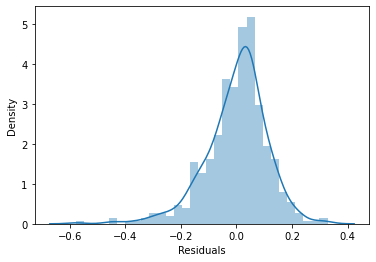

In [394]:
#Validiating Linear Regresion assumptions 
sns.distplot(res_train)
plt.xlabel("Residuals")
plt.show()

- Errors are normally distributed

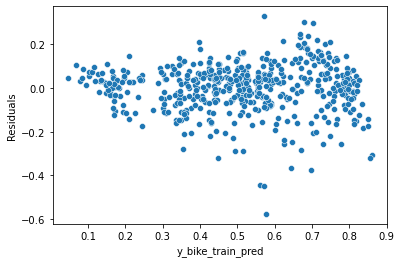

In [395]:
sns.scatterplot(y_bike_train_pred, res_train)
plt.xlabel("y_bike_train_pred")
plt.ylabel("Residuals")
plt.show()

- Error points are independent and there is homoscedasticity.

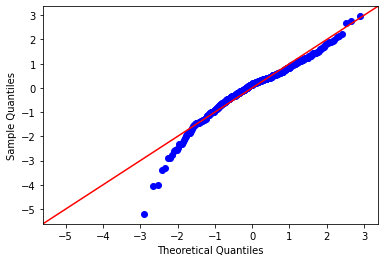

In [396]:
#plotting Q-Q plot
import statsmodels.api as sm
import pylab as py
sm.qqplot(res_train,line='45', fit=True)
py.show()

In [419]:
res_train.mean()

-1.35240402754584e-16

# Step 7: Making Predictions Using the Final Model on test data

In [397]:
#predicing values
#normalising test data
cols=['mnth',
       'temp', 'atemp', 'hum', 'windspeed','weekday', 'cnt']
bike_test[cols] =scaler.transform(bike_test[cols])

In [398]:
# defining X & Y
X_bike_test=bike_test[[ 'yr', 'temp', 'windspeed', 'spring' ]]
y_bike_test=bike_test['cnt']
#add constant
X_bike_test_sm =sm.add_constant(X_bike_test)

In [399]:
y_bike_test_pred= lr.predict(X_bike_test_sm)

In [400]:
res_test= y_bike_test-y_bike_test_pred

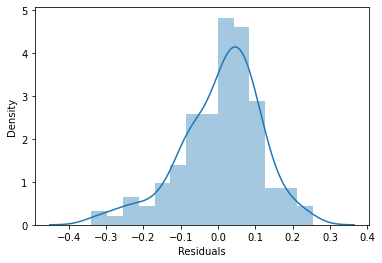

In [401]:
sns.distplot(res_test)
plt.xlabel("Residuals")
plt.show()

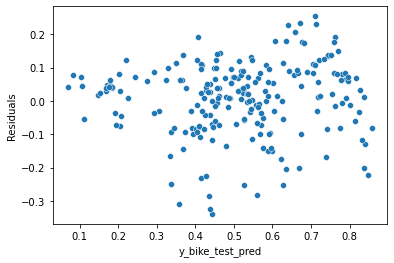

In [402]:
sns.scatterplot(y_bike_test_pred, res_test)
plt.xlabel("y_bike_test_pred")
plt.ylabel("Residuals")
plt.show()

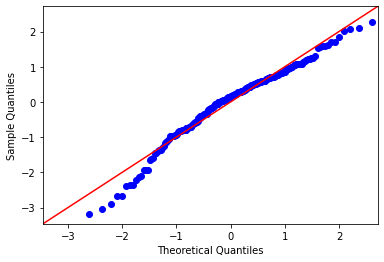

In [408]:
#plotting Q-Q plot
import statsmodels.api as sm
import pylab as py
sm.qqplot(res_test,line='45', fit=True)
py.show()

# Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

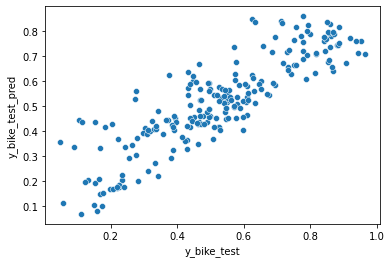

In [404]:
sns.scatterplot(y_bike_test,y_bike_test_pred )
plt.xlabel("y_bike_test")
plt.ylabel("y_bike_test_pred")
plt.show()

In [405]:
from sklearn.metrics import r2_score

In [406]:
r2_score_train =r2_score(y_true =y_bike_train, y_pred =y_bike_train_pred)
print("R sqaured value of Train data is :",round(r2_score_train,5))

R sqaured value of Train data is : 0.75556


In [407]:
r2_score_test =r2_score(y_true =y_bike_test, y_pred =y_bike_test_pred)
print("R sqaured value of Test data is :",round(r2_score_test,5))

R sqaured value of Test data is : 0.75227


# Step 9: Conclusion & Recommendations

### Conclusion:
1. Bike-sharing systems are slowly gaining popularity as awareness is increasing, the demand for these bikes is increasing every year.
2. Temperature is having positive correlation with total no. of bike rentals. 
3. Demand for rental bike is in negative relation to windspeed as expected.
4. Demand for bikes is having negative corelation with spring season as average temperature in springs is even lower than winters.
5. The regsitered users are highest on weekday, probably office going employees,  students etc,, however registered users are lowest on weekends and for casual users trend is opposit i.e. highest on weekdends and lowest on weekdays.

### Recommendations:
1. As data is of USA during winters due to temperature fall demand for bikes decreses, company can start offering bikes which are easy to drive in winter season amid snow and may offer discounts in winter months and charge higher in summers due to increased demand in summers.
2. Comapny should focus on registered users by offering attractive subscription plans in order to aquire these costumers for long term revenue stream as these customers accounts for about 81.16 %.